## Import library

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt

2025-04-18 15:26:13.242770: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load data

In [2]:
data = fashion_mnist
(X_train, Y_train),(X_test, Y_test) = data.load_data()

X_train.shape, Y_train.shape,X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Show images

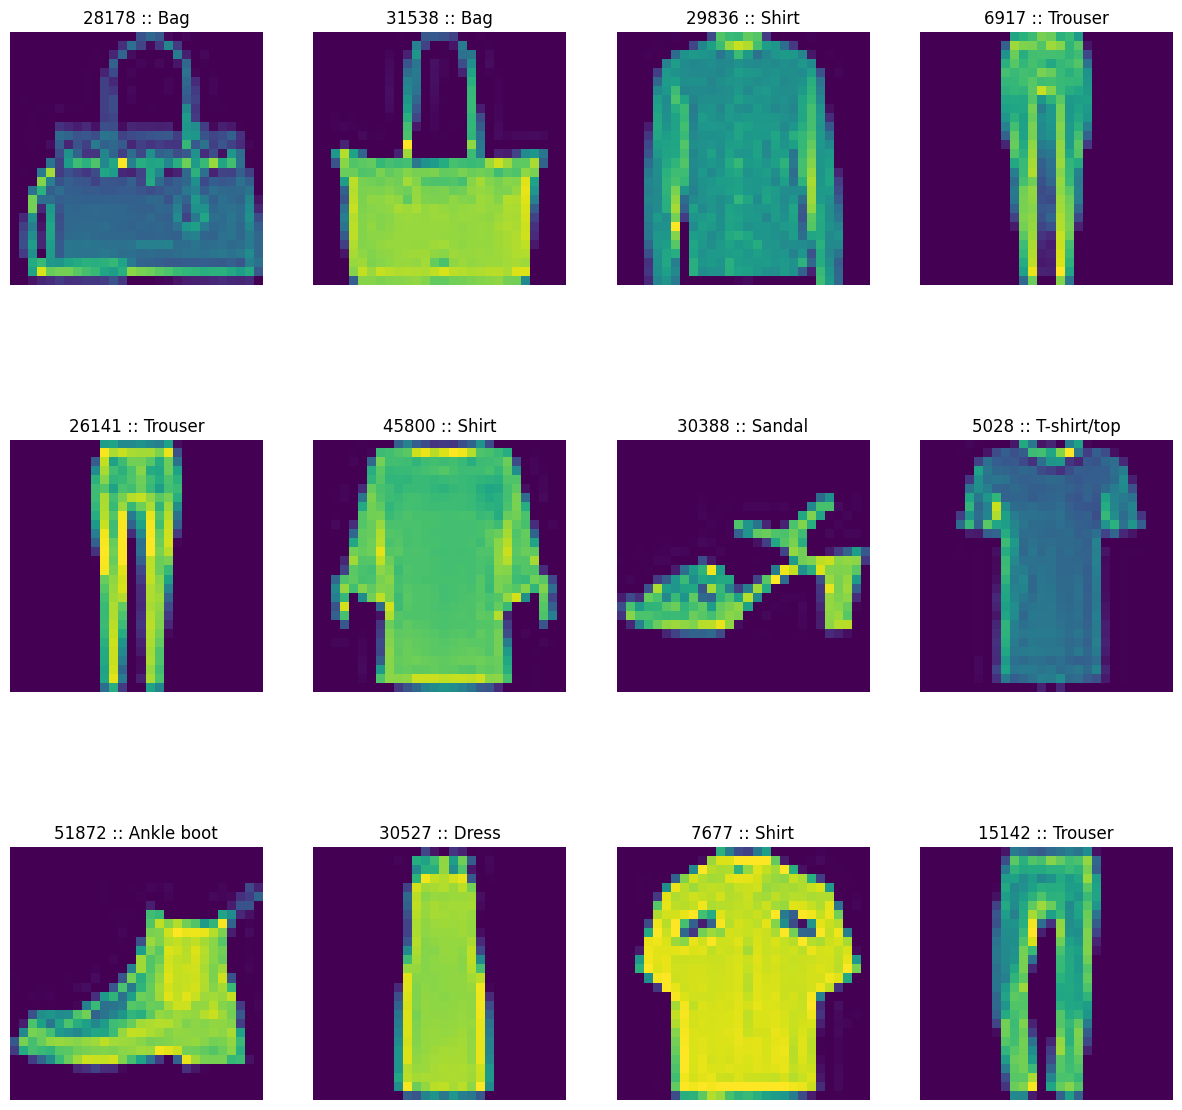

In [4]:
img_idx = np.random.choice(60000, 12)

plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[idx])
    plt.title(f"{idx} :: {labels[Y_train[idx]]}")
    plt.axis('off')

plt.show()

## Data preprocessing

### Normalization 

In [5]:
X_train = X_train/255.0

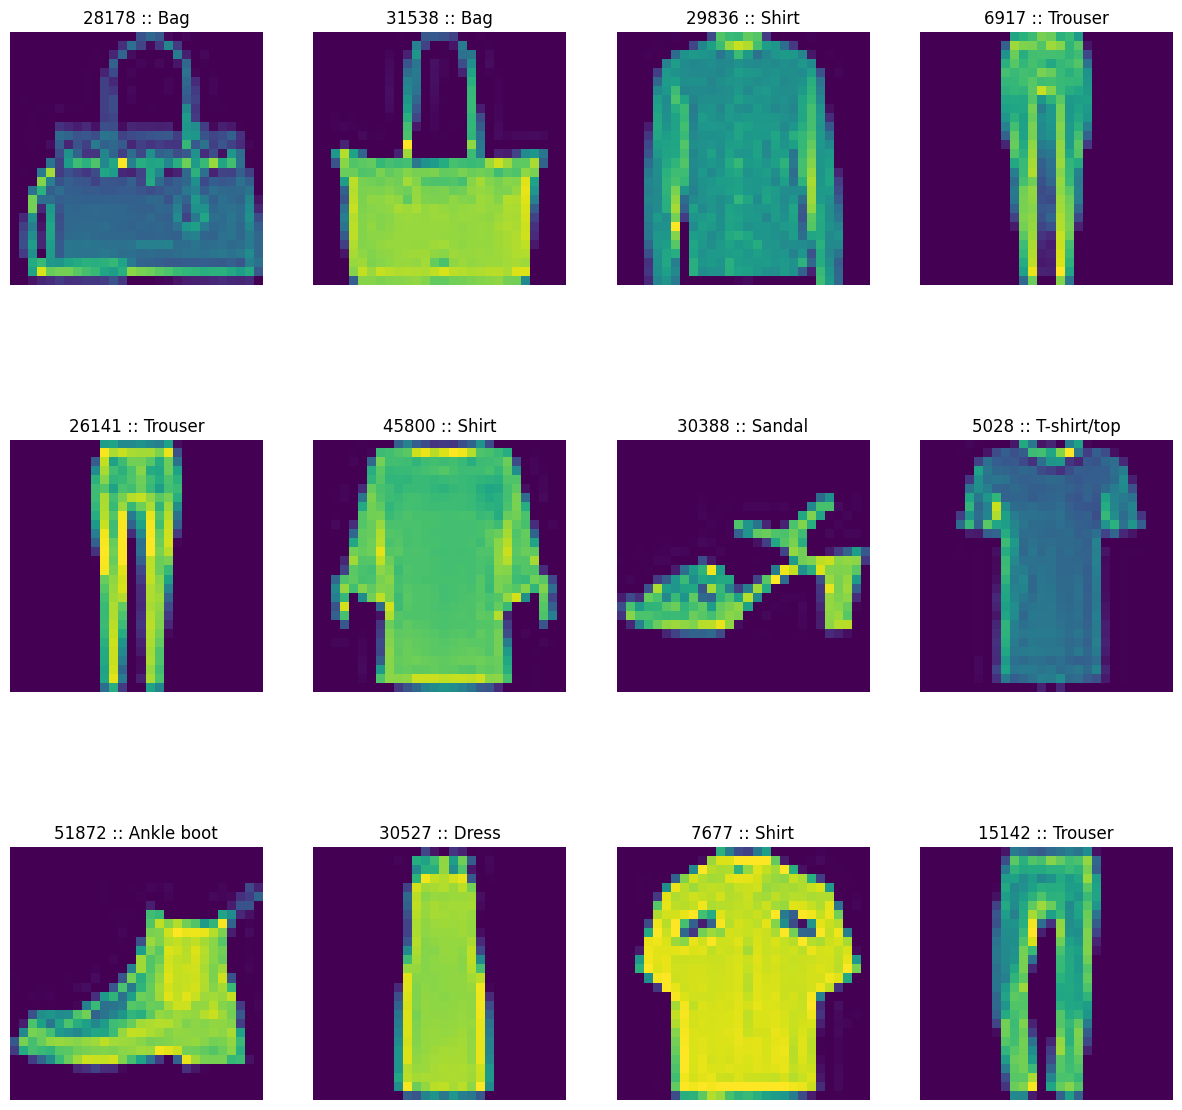

In [6]:
plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[idx])
    plt.title(f"{idx} :: {labels[Y_train[idx]]}")
    plt.axis('off')

plt.show()

In [7]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [8]:
X_train= X_train.reshape(60000, 28,28,1)
X_test= X_test.reshape(10000, 28,28,1)

### Split train-valid set

In [9]:
train_X, valid_x, train_y, valid_y = train_test_split(X_train, Y_train, test_size = 0.3)

In [10]:
train_X.shape, train_y.shape, valid_x.shape, valid_y.shape

((42000, 28, 28, 1), (42000,), (18000, 28, 28, 1), (18000,))

### One Hot Encoding

In [11]:
encoder = OneHotEncoder()
enc_y_train = encoder.fit_transform(train_y.reshape(-1,1))

In [12]:
enc_y_valid = encoder.transform(valid_y.reshape(-1,1))

In [13]:
enc_y_train.shape, enc_y_valid.shape

((42000, 10), (18000, 10))

In [14]:
enc_y_train = enc_y_train.toarray()
enc_y_valid = enc_y_valid.toarray()

In [15]:
enc_y_train[0], enc_y_valid[0]

(array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]))

## First CNN Model

Conv2D[5x5] + ReLU => Polling[3,3] => Flatten => Dense[64]+ ReLU => Dense[10] + softmax

### Create Model

In [16]:
model_cnn1 = Sequential()

In [17]:
from tensorflow.keras.layers import MaxPool2D, Input

In [18]:
model_cnn1.add(Input(shape=(28,28,1)))
model_cnn1.add(Conv2D(filters=5, kernel_size=(5,5), activation='relu'))
model_cnn1.add(MaxPool2D(pool_size=(3,3)))
model_cnn1.add(Flatten())
model_cnn1.add(Dense(units=64, activation='relu'))
model_cnn1.add(Dense(units=10, activation = 'softmax'))

In [19]:
model_cnn1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 5)      │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,324 (83.30 KB)

 Trainable params: 21,324 (83.30 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
from tensorflow.keras.utils import plot_model

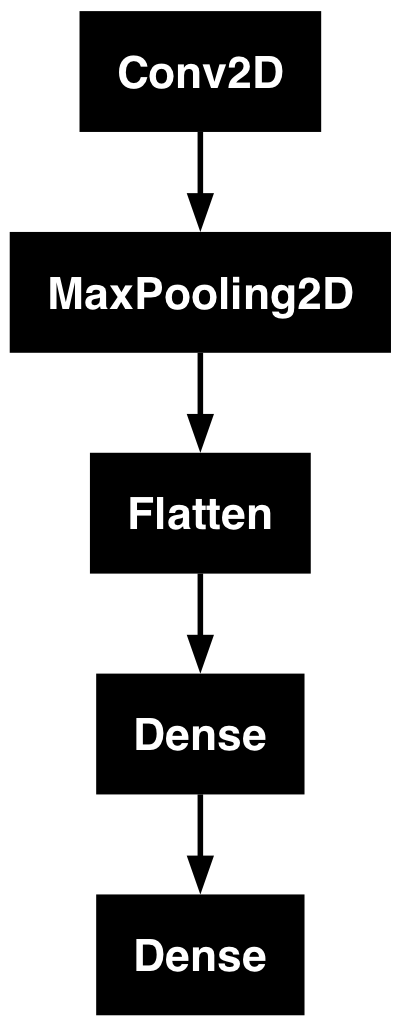

In [57]:
plot_model(model=model_cnn1, to_file='model_cnn1.png')

### Compile and Callbacks

In [20]:
model_cnn1.compile(optimizer='adam', metrics = ['accuracy'], loss= 'categorical_crossentropy')

In [21]:
early_stopping = EarlyStopping(patience=3, monitor='val_accuracy')

In [22]:
model_checkpoint = ModelCheckpoint(filepath='checkpoint/best_model_cnn1.keras', save_best_only=True)

### Training Model

In [23]:
model_cnn1.fit(x=train_X, y=enc_y_train, validation_data=(valid_x, enc_y_valid), batch_size=100, epochs=10, 
               callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6579 - loss: 1.0683 - val_accuracy: 0.8198 - val_loss: 0.4885
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8393 - loss: 0.4544 - val_accuracy: 0.8413 - val_loss: 0.4488
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8574 - loss: 0.4097 - val_accuracy: 0.8680 - val_loss: 0.3840
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8690 - loss: 0.3745 - val_accuracy: 0.8692 - val_loss: 0.3717
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8711 - loss: 0.3608 - val_accuracy: 0.8700 - val_loss: 0.3665
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8758 - loss: 0.3472 - val_accuracy: 0.8798 - val_loss: 0.3429
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8828 - loss: 0.3297 - val_accuracy: 0.8816 - val_loss: 0.3373
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8855 - loss: 0.3167 - val_accu

### Training evaluation

In [24]:
hist = model_cnn1.history.history

<function matplotlib.pyplot.show(close=None, block=None)>

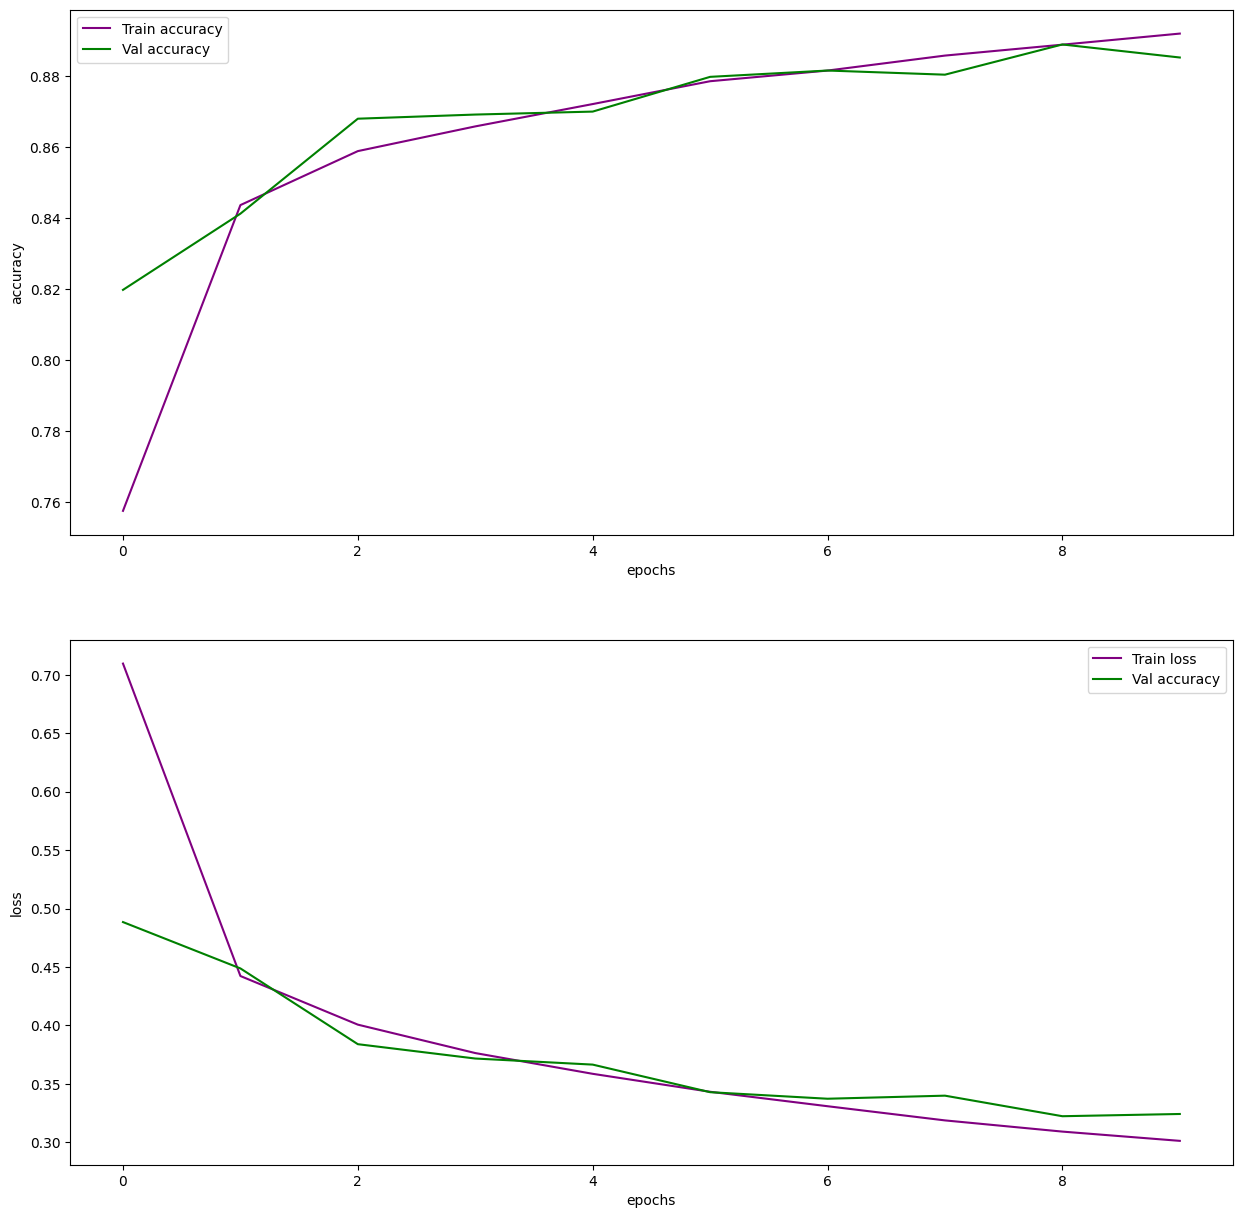

In [25]:
plt.figure(figsize=[15,15])

plt.subplot(2,1,1)
plt.plot(hist['accuracy'], label='Train accuracy', color='purple')
plt.plot(hist['val_accuracy'], label='Val accuracy', color='green')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

plt.subplot(2,1,2)
plt.plot(hist['loss'], label='Train loss', color='purple')
plt.plot(hist['val_loss'], label='Val accuracy', color='green')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

plt.show

### Test model

In [26]:
model_cnn1.load_weights('checkpoint/best_model_cnn1.keras')

In [27]:
Y_hat = model_cnn1.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [28]:
Y_hat = [np.argmax(pred) for pred in Y_hat]

In [29]:
Y_hat[0], Y_test[0]

(9, 9)

In [30]:
Y_hat = np.array(Y_hat)

In [31]:
print(f"Accuracy Test : {100*np.sum(Y_hat == Y_test)/len(Y_test):.3f}%")

Accuracy Test : 82.580%


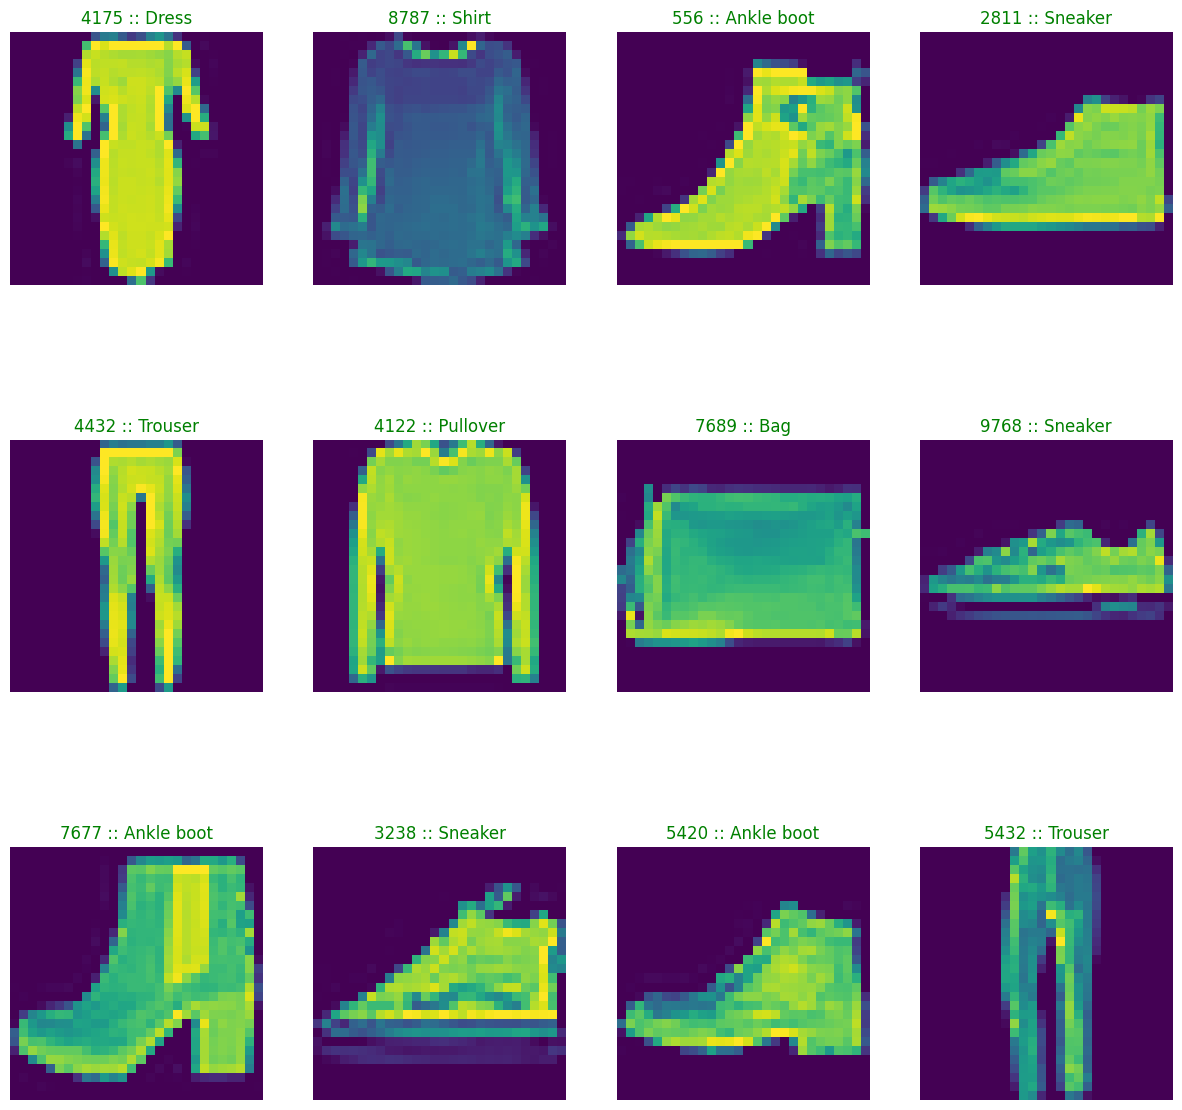

In [32]:
img_idx = np.random.choice(10000, 12)

plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    if Y_hat[idx] == Y_test[idx]:
        col = 'green'
        title = f"{idx} :: {labels[Y_hat[idx]]}"
    else:
        col = 'red'
        title = f"{idx} :: {labels[Y_hat[idx]]} ({labels[Y_test[idx]]})"

    plt.imshow(X_test[idx])
    plt.title(title, color = col)
    plt.axis('off')

plt.show()

### Classification report

In [33]:
print(classification_report(Y_test, Y_hat, target_names=labels, zero_division=0,digits=3))

              precision    recall  f1-score   support

 T-shirt/top      0.890     0.709     0.789      1000
     Trouser      0.847     0.984     0.910      1000
    Pullover      0.898     0.573     0.700      1000
       Dress      0.943     0.678     0.789      1000
        Coat      0.533     0.966     0.687      1000
      Sandal      0.968     0.944     0.956      1000
       Shirt      0.627     0.527     0.573      1000
     Sneaker      0.953     0.932     0.942      1000
         Bag      0.947     0.967     0.957      1000
  Ankle boot      0.924     0.978     0.950      1000

    accuracy                          0.826     10000
   macro avg      0.853     0.826     0.825     10000
weighted avg      0.853     0.826     0.825     10000



In [34]:
reports = classification_report(Y_test, Y_hat, target_names=labels, zero_division=0, output_dict=True)

precision = []
recall = []
f1_score = []

for key in labels:
    precision.append(reports[key]['precision'])
    recall.append(reports[key]['recall'])
    f1_score.append(reports[key]['f1-score'])

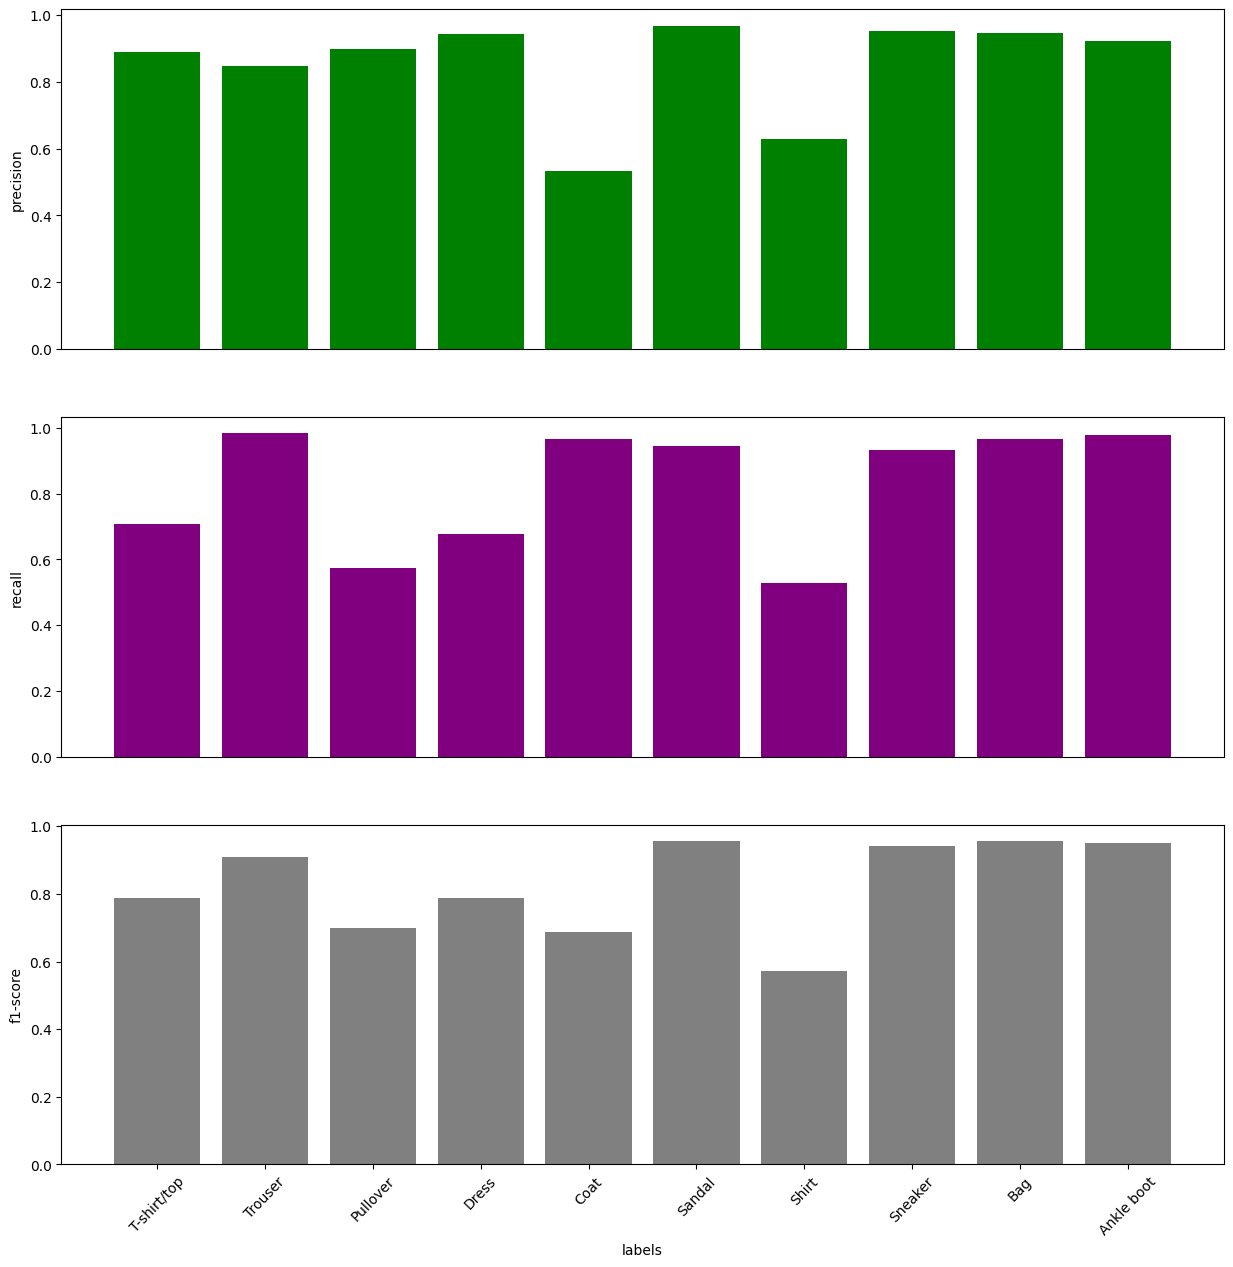

In [35]:
plt.figure(figsize=[15,15])

plt.subplot(3,1,1)
plt.bar(x=labels, height=precision, color = 'green')
plt.xticks(rotation = 45)
plt.ylabel('precision')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,2)
plt.bar(x=labels, height=recall, color = 'purple')
plt.xticks(rotation = 45)
plt.ylabel('recall')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,3)
plt.bar(x=labels, height=f1_score, color = 'gray')
plt.xticks(rotation = 46)
plt.ylabel('f1-score')
plt.xlabel('labels')

plt.show()

## CNN Model with Multiple Conv Layers

### Create Model

Conv2D[7x7] + ReLU => MaxPooling[3x3] => Conv2D[5x5] + ReLU => MaxPooling[3x3] => Conv2D[3x3] + ReLU => MaxPooling[2x2] => Flatten => Dense[64] + ReLU => Dense[10] + SoftMax

In [36]:
model_cnn2 = Sequential()

model_cnn2.add(Input(shape=(28,28,1)))
model_cnn2.add(Conv2D(filters=10, kernel_size=(5,5), activation='relu'))
model_cnn2.add(MaxPool2D(pool_size=(3,3)))
model_cnn2.add(Dropout(rate = 0.3))
model_cnn2.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu'))
model_cnn2.add(MaxPool2D(pool_size=(2,2)))
model_cnn2.add(Dropout(rate = 0.3))

model_cnn2.add(Flatten())
model_cnn2.add(Dense(units=64, activation='relu'))
model_cnn2.add(Dense(units=10, activation='softmax'))

In [37]:
model_cnn2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         5,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,644 (29.86 KB)

 Trainable params: 7,644 (29.86 KB)

 Non-trainable params: 0 (0.00 B)

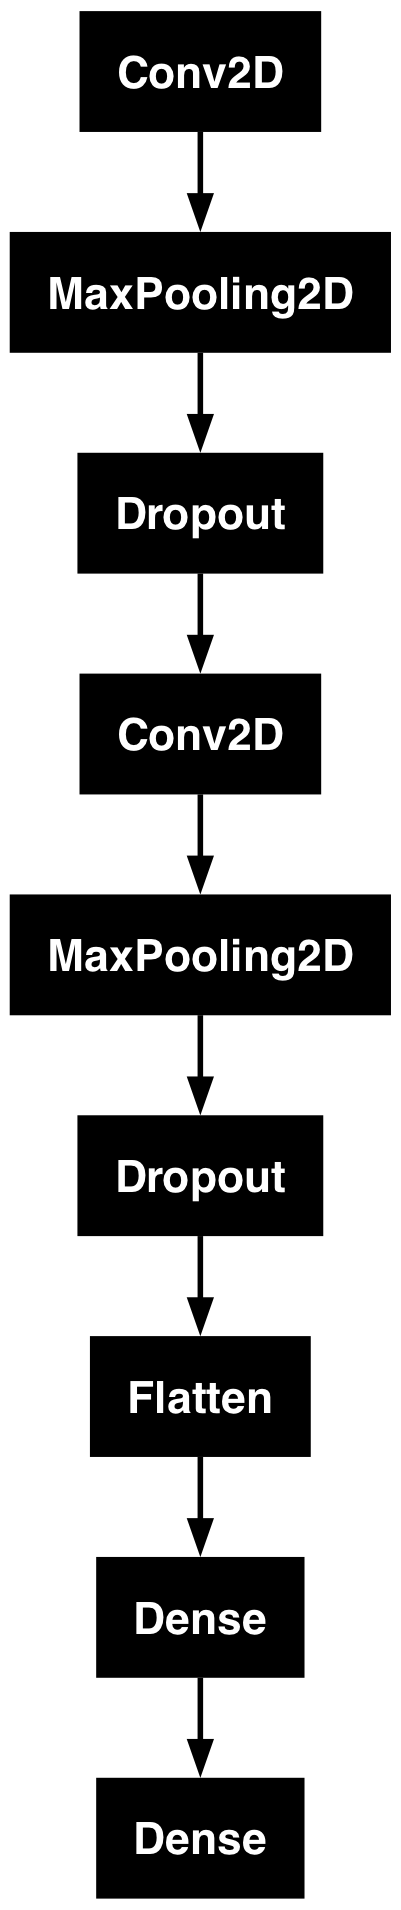

In [58]:
plot_model(model=model_cnn2, to_file='model_cnn2.png')

### Compile and Callbacks

In [38]:
model_cnn2.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics = ['accuracy'])

In [39]:
early_stopping = EarlyStopping(patience=3, monitor='val_accuracy')

In [40]:
model_checkpoint = ModelCheckpoint(filepath='checkpoint/best_model_cnn2.keras', save_best_only=True)

### Training Model

In [41]:
model_cnn2.fit(x=train_X, y=enc_y_train, validation_data=(valid_x, enc_y_valid), batch_size=100, epochs=10, 
               callbacks=[early_stopping, model_checkpoint])

Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.4355 - loss: 1.5351 - val_accuracy: 0.7383 - val_loss: 0.6692
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7242 - loss: 0.7312 - val_accuracy: 0.7749 - val_loss: 0.5892
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7530 - loss: 0.6638 - val_accuracy: 0.8004 - val_loss: 0.5433
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7653 - loss: 0.6303 - val_accuracy: 0.8137 - val_loss: 0.5209
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7769 - loss: 0.5991 - val_accuracy: 0.8204 - val_loss: 0.5002
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7856 - loss: 0.5797 - val_accuracy: 0.8311 - val_loss: 0.4824
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7909 - loss: 0.5592 - val_accuracy: 0.8361 - val_loss: 0.4665
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8017 - loss: 0.5410 - val_accu

### Training evaluation

In [42]:
hist = model_cnn2.history.history

<function matplotlib.pyplot.show(close=None, block=None)>

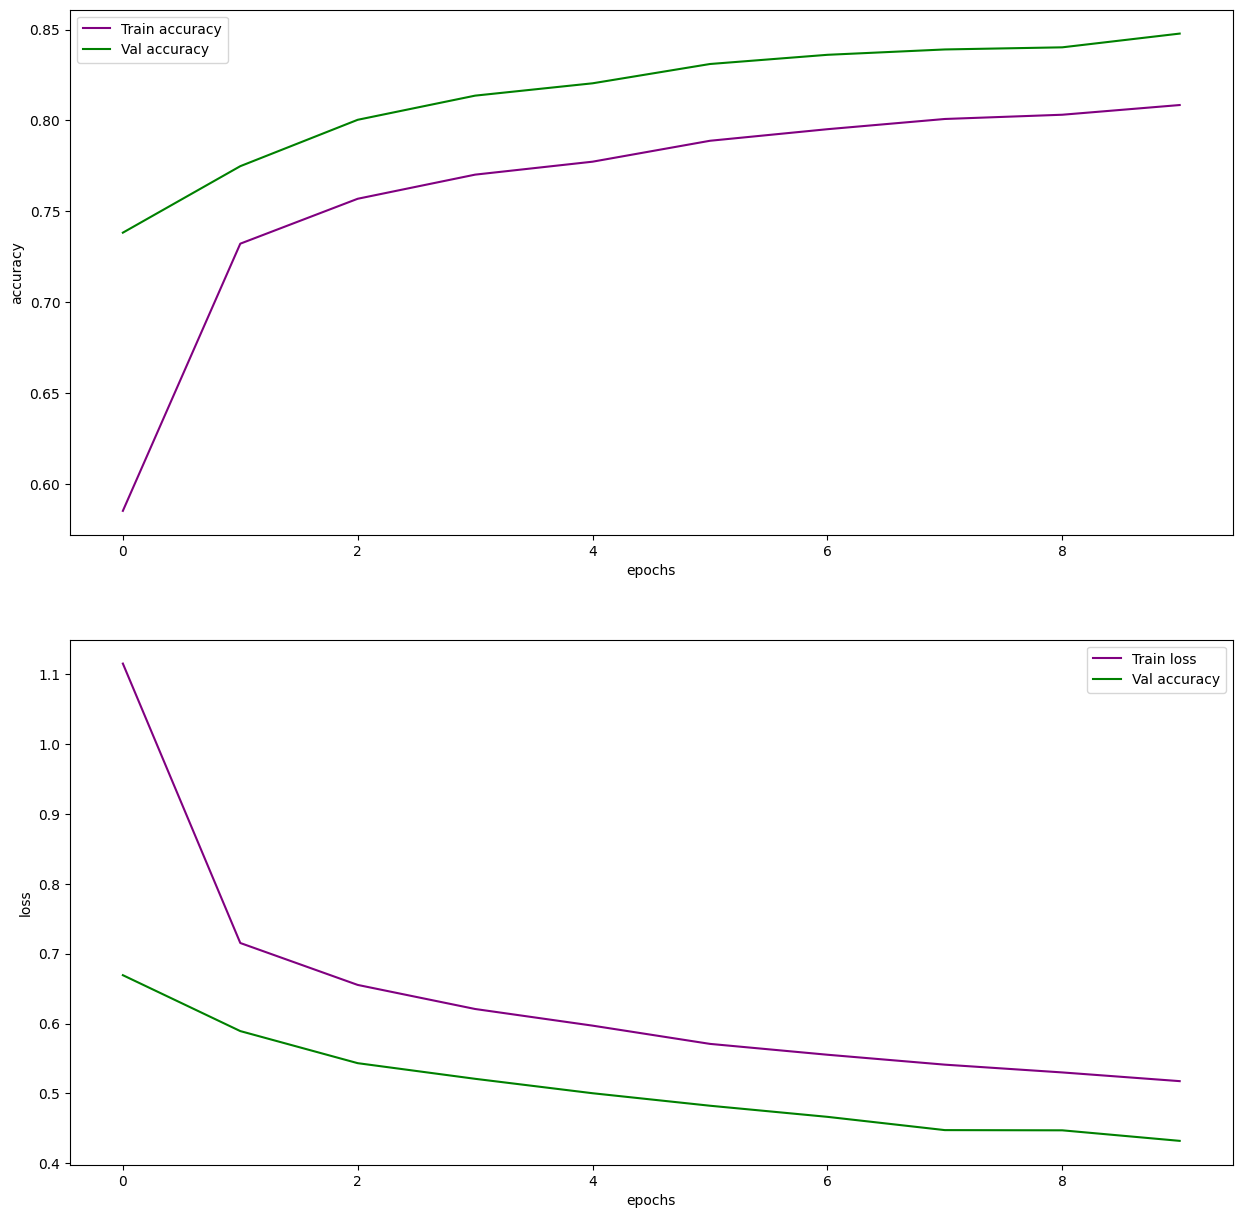

In [43]:
plt.figure(figsize=[15,15])

plt.subplot(2,1,1)
plt.plot(hist['accuracy'], label='Train accuracy', color='purple')
plt.plot(hist['val_accuracy'], label='Val accuracy', color='green')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

plt.subplot(2,1,2)
plt.plot(hist['loss'], label='Train loss', color='purple')
plt.plot(hist['val_loss'], label='Val accuracy', color='green')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

plt.show

### Test Model

In [44]:
model_cnn2.load_weights('checkpoint/best_model_cnn2.keras')

In [45]:
Y_hat = model_cnn2.predict(X_test)
Y_hat = [np.argmax(pred) for pred in Y_hat]
Y_hat[0], Y_test[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


(9, 9)

In [46]:
Y_hat = np.array(Y_hat)

In [47]:
print(f"Accuracy Test : {100*np.sum(Y_hat == Y_test)/len(Y_test):.3f}%")

Accuracy Test : 82.580%


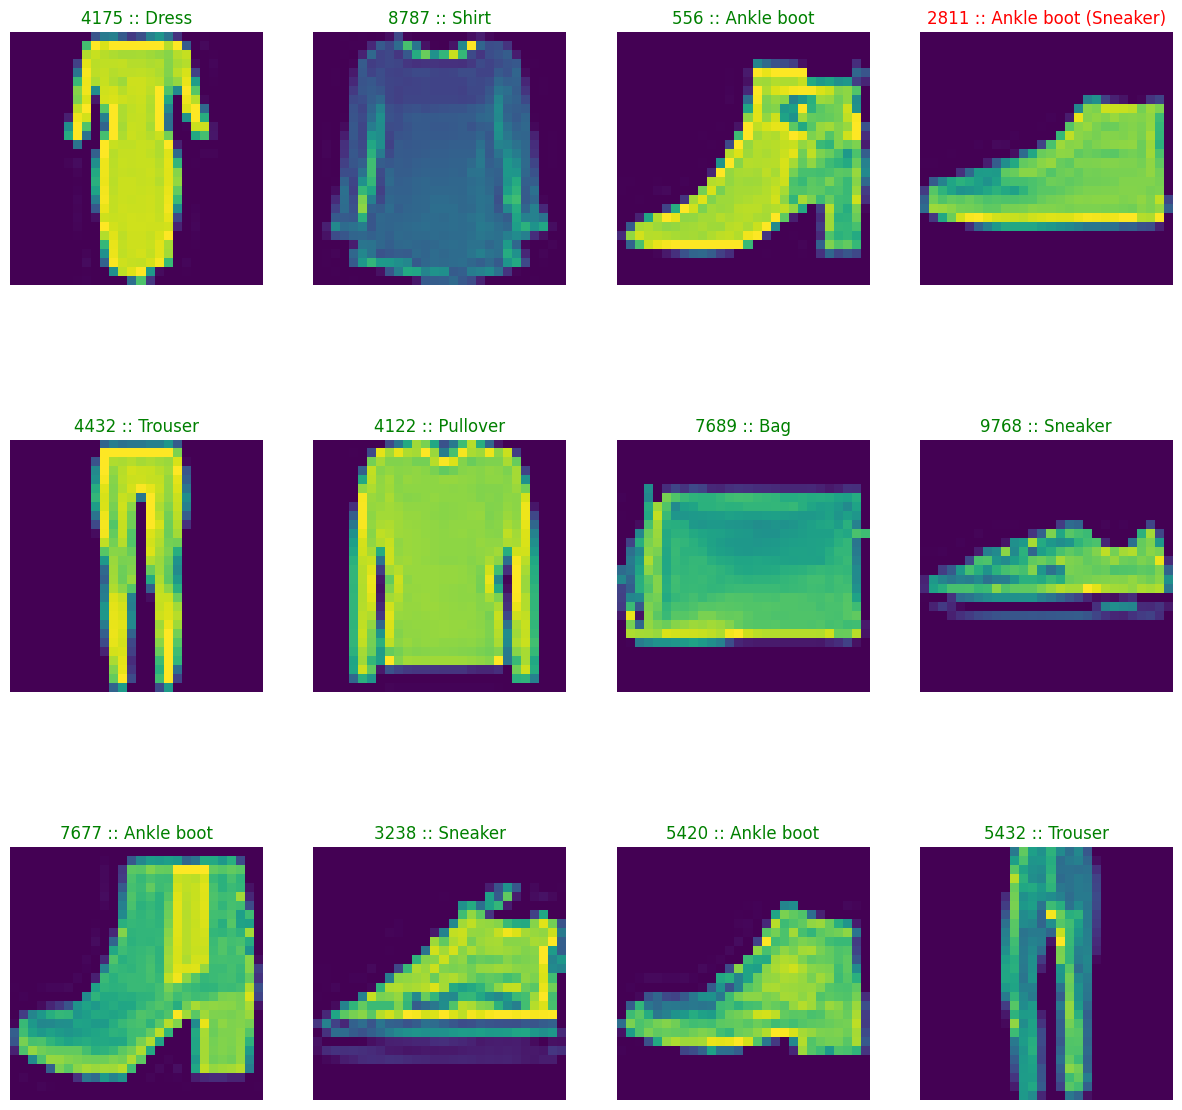

In [48]:
plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    if Y_hat[idx] == Y_test[idx]:
        col = 'green'
        title = f"{idx} :: {labels[Y_hat[idx]]}"
    else:
        col = 'red'
        title = f"{idx} :: {labels[Y_hat[idx]]} ({labels[Y_test[idx]]})"

    plt.imshow(X_test[idx])
    plt.title(title, color = col)
    plt.axis('off')

plt.show()

### Classification report

In [49]:
print(classification_report(Y_test, Y_hat, target_names=labels, zero_division=0,digits=3))

              precision    recall  f1-score   support

 T-shirt/top      0.774     0.794     0.784      1000
     Trouser      0.861     0.982     0.918      1000
    Pullover      0.738     0.739     0.739      1000
       Dress      0.842     0.797     0.819      1000
        Coat      0.646     0.843     0.731      1000
      Sandal      0.934     0.963     0.948      1000
       Shirt      0.699     0.399     0.508      1000
     Sneaker      0.952     0.818     0.880      1000
         Bag      0.957     0.947     0.952      1000
  Ankle boot      0.864     0.976     0.916      1000

    accuracy                          0.826     10000
   macro avg      0.827     0.826     0.819     10000
weighted avg      0.827     0.826     0.819     10000



In [50]:
reports = classification_report(Y_test, Y_hat, target_names=labels, zero_division=0, output_dict=True)

precision = []
recall = []
f1_score = []

for key in labels:
    precision.append(reports[key]['precision'])
    recall.append(reports[key]['recall'])
    f1_score.append(reports[key]['f1-score'])

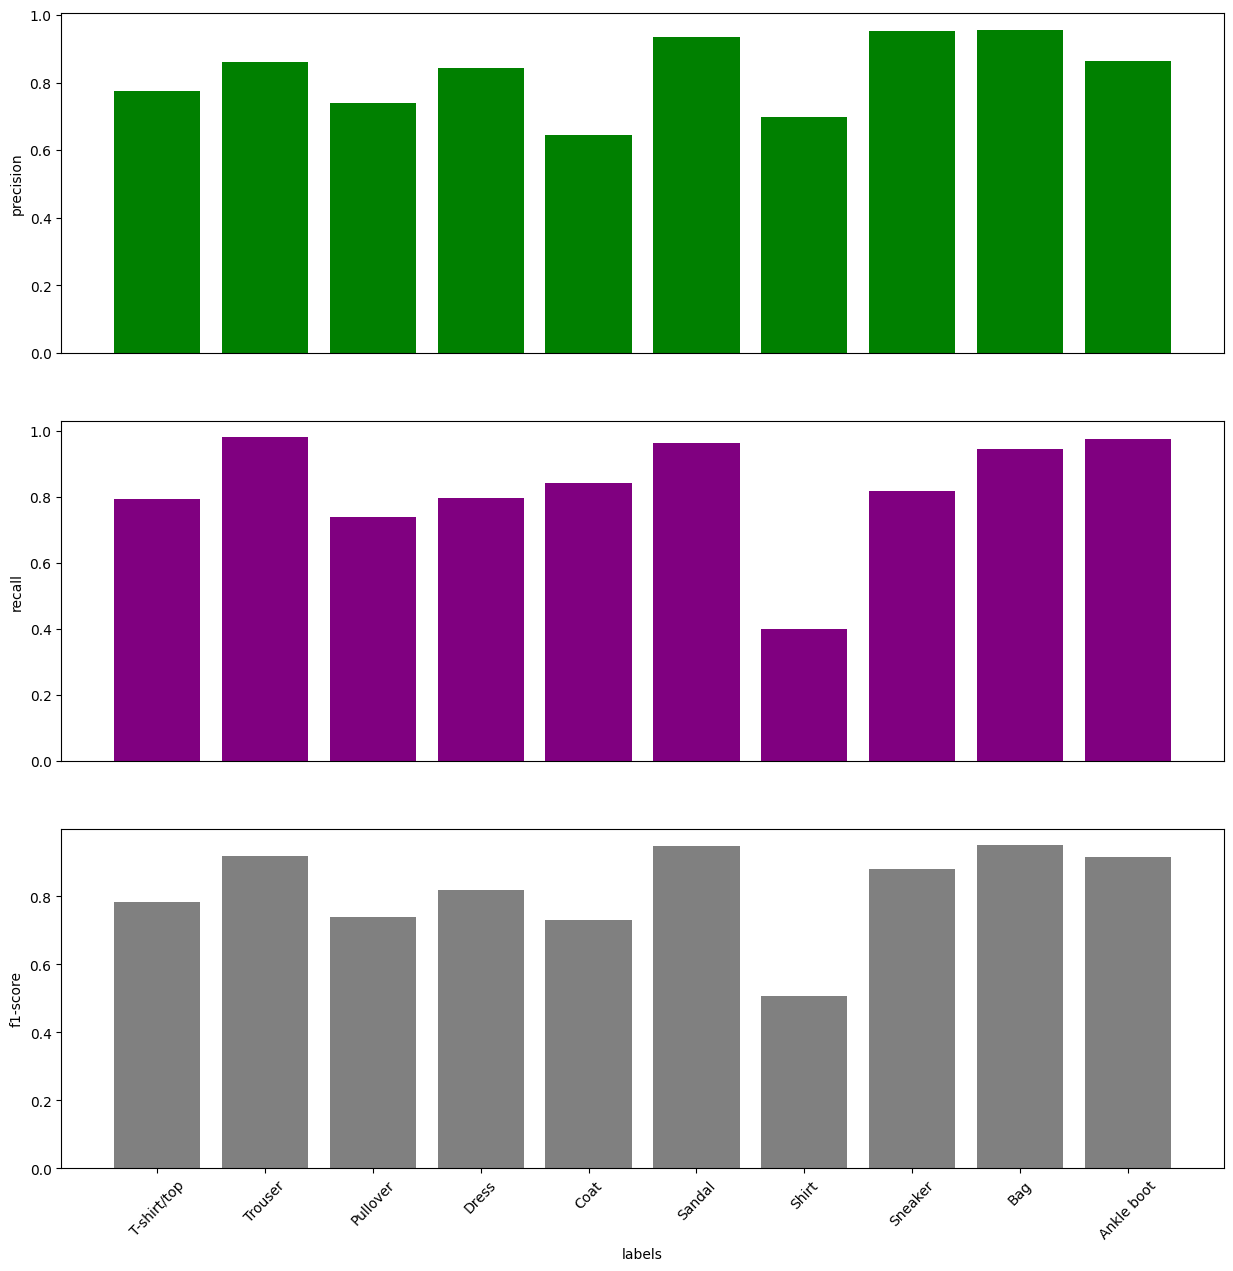

In [51]:
plt.figure(figsize=[15,15])

plt.subplot(3,1,1)
plt.bar(x=labels, height=precision, color = 'green')
plt.xticks(rotation = 45)
plt.ylabel('precision')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,2)
plt.bar(x=labels, height=recall, color = 'purple')
plt.xticks(rotation = 45)
plt.ylabel('recall')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,3)
plt.bar(x=labels, height=f1_score, color = 'gray')
plt.xticks(rotation = 46)
plt.ylabel('f1-score')
plt.xlabel('labels')

plt.show()